In [1]:
import sympy
import numpy
import scipy
import matplotlib.pyplot as plt
import random

import datetime

import math

import pandas

import control

import scipy.optimize
from tbcontrol.responses import fopdt, sopdt
from ipywidgets import interact

import tclab

In [2]:
TCLab = tclab.setup(connected= True) #False, speedup=100)

Specifications

In [3]:
spans_deltas = 16
init_spans = 2

spans = spans_deltas+init_spans

base_unit = 60*20 #Each span lasts base_unit seconds

q_init = 50
q_final = 50

setpoint = 30

In [4]:
increment = (q_final-q_init)/(spans-1)

run_time = base_unit*spans

In [5]:
str(datetime.timedelta(seconds=run_time))

'6:00:00'

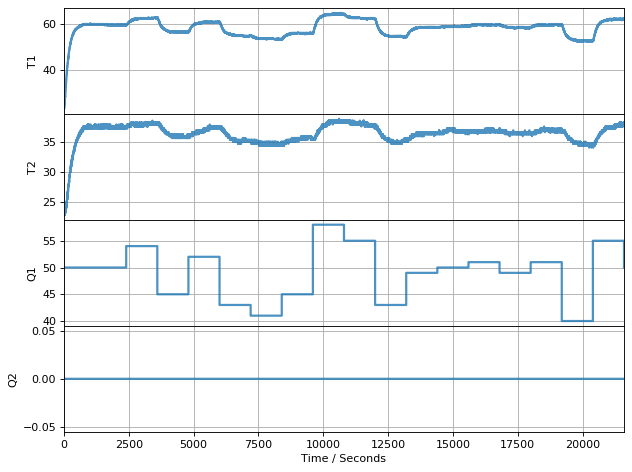

TCLab disconnected successfully.


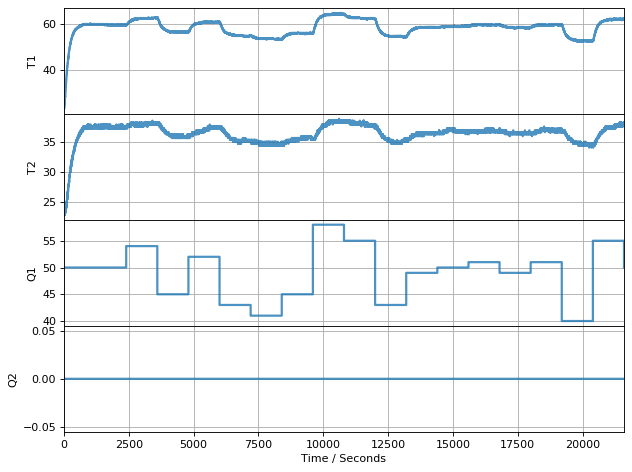

In [6]:
with TCLab() as lab:
    h = tclab.Historian(lab.sources)
    tcplot = tclab.Plotter(h, run_time)
    q_test = q_init
    
    base_unit_checker = init_spans
    
    for t in tclab.clock(run_time):
        
        base_unit_counter = t/base_unit
        
        print(base_unit_counter, base_unit_checker, t, increment, q_test)
        
        if base_unit_counter == base_unit_checker:
            
            base_unit_checker = base_unit_counter+1
            
            increment = random.randint(40 - q_test,60 - q_test)
            while increment == 0:
                increment = random.randint(40 - q_test,60 - q_test)

            q_test += increment

        lab.Q1(q_test)
        tcplot.update(t)

In [7]:
h.get_sessions()

[(1, '2020-02-27 19:23:13', 21601)]

In [8]:
h.load_session(1)

In [9]:
data = {"Time" : h.t, "T1" : h.logdict['T1'], "T2" : h.logdict['T2'], "Q1" : h.logdict['Q1'], "Q2" : h.logdict['Q2']}

In [10]:
data_frame = pandas.DataFrame(data = data)
data_frame.to_csv("long_span_run 20200227 overnight.csv")

In [14]:
def fopdt_pos(t, K, tau, theta, y0):
    return fopdt(t, K, numpy.exp(tau), theta, y0)

54.0 50.0
[0.7341360491863929, 5.210123907977371, 16.559014472419413, 59.523529460492334] 4.0 2401 3600
45.0 54.0
[0.6774381067692021, 5.00318530935408, 21.880950702722618, 62.53818192956931] -9.0 3601 4800
52.0 45.0
[0.5918406173295354, 5.040559078180837, 13.000100995585509, 56.573240300896146] 7.0 4801 6000
43.0 52.0
[0.6587642439039652, 5.125181352181385, 11.311544977550096, 60.70999990554319] -9.0 6001 7200
41.0 43.0
[0.665168891367717, 5.08636176827353, 24.000324775225323, 54.7982710939057] -2.0 7201 8400
45.0 41.0
[0.6387911785228116, 4.948465387790217, 22.256208149276805, 53.376521840162795] 4.0 8401 9600
58.0 45.0
[0.6292754662892898, 5.034289775309076, 15.937080631929664, 56.03874984767521] 13.0 9601 10800
55.0 58.0
[0.6353189300767638, 5.406787938618023, -20.03274127532651, 64.18440105989453] -3.0 10801 12000
43.0 55.0
[0.6373484264704146, 5.03641510581949, 18.059160697072777, 62.09263157538431] -12.0 12001 13200
49.0 43.0
[0.6713988296146404, 5.001927203463662, 21.9917829630

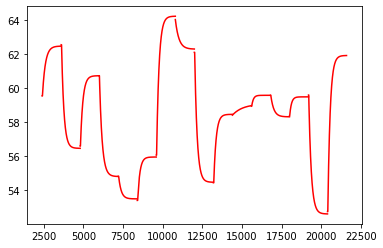

In [55]:
for span in range(init_spans ,spans):
    lower = span*base_unit +1
    upper = (span+1)*base_unit
    
    print (data_frame['Q1'][upper-1], data_frame['Q1'][lower-2])
    
    q_change = data_frame['Q1'][upper-1] - data_frame['Q1'][lower-2]
        
    [K, tau, theta, y0], _ = scipy.optimize.curve_fit(fopdt_pos, numpy.array(h.t[lower:upper])-h.t[lower], h.logdict['T1'][lower:upper], [2, 4, 20, 50])

    print([K/q_change, tau, theta, y0], q_change, lower, upper)
    tau = numpy.exp(tau)
    
#     plt.plot(h.t[lower:upper], h.logdict['T1'][lower:upper], 'go')
    plt.plot(h.t[lower:upper], fopdt(numpy.array(h.t[lower:upper])-h.t[lower], K, tau, theta, y0), 'r')